In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding, Flatten, SimpleRNN
from keras.optimizers import RMSprop
from keras.layers import LSTM
from keras.layers import Bidirectional
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/IMDB Dataset.csv")

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


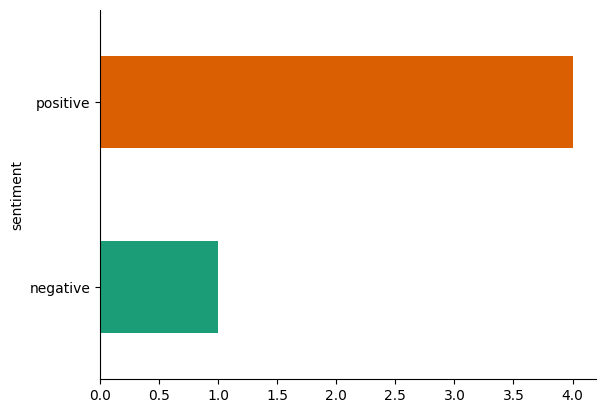

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


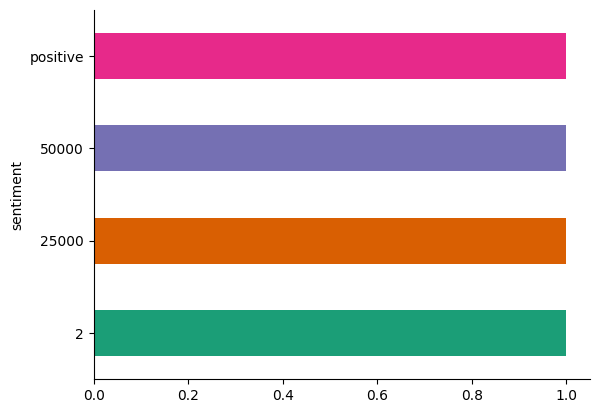

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
train_data, test_data = train_test_split(data, test_size = 0.20)

In [ ]:
train_data

,review,sentiment
20247,Daniel Day Lewis is one of the best actors of ...,positive
37973,I had been interested in this film for a long ...,positive
12310,While it may not be his most laugh-packed film...,positive
38132,"Of course, the story line for this movie isn't...",positive
10539,"The story-line of ""The Thief of Bagdad"" is com...",positive
...,...,...
49679,I enjoyed this film yet hated it because I wan...,positive
9266,"Shot entirely on location in Bulgaria, The Man...",positive
25852,It's interesting to see what the director trie...,negative
18689,First I'd like to excuse my bad English.<br />...,negative


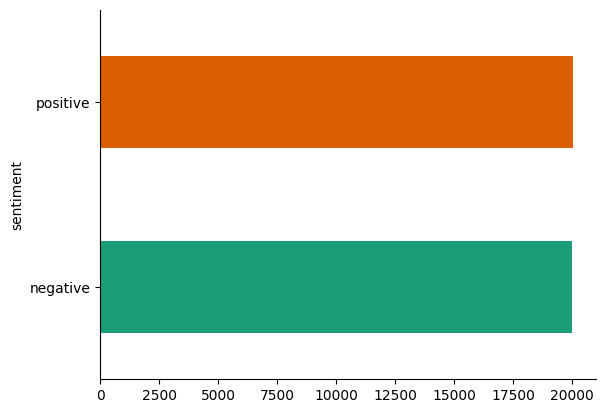

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
train_data.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
test_data

,review,sentiment
11336,I saw this movie by accident yesterday at a ci...,negative
23162,I'm far from a Sylvester Stallone fan and I gu...,positive
27416,"""Antwone Fisher"" tells of a young black U.S. N...",positive
47397,This is my first review on IMDb.com and probab...,negative
49637,If you liked the Richard Chamberlain version o...,positive
...,...,...
28085,This movie was long and boring. Surprising tha...,negative
3675,"Widely known as ""Don't Look in the Basement"" -...",positive
37319,*Spoilers herein* <br /><br />Where do I begin...,negative
4031,The only good part about this film is the beau...,negative


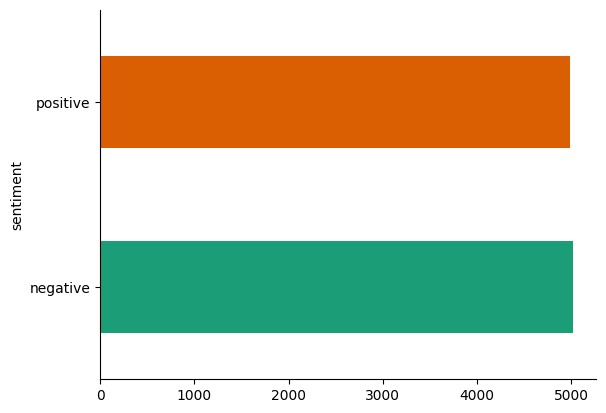

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
test_data.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
glove_vectors_file = "/content/glove.6B.100d.txt"
glove_vectors = {}
glove_vectors = {}
with open(glove_vectors_file, encoding='utf-8') as file:
    for line in file:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype='float32')
        glove_vectors[word] = vector

words = list(glove_vectors.keys())
vectors = np.array(list(glove_vectors.values()))

In [ ]:
def text_to_glove_vectors(reviews, glove_vectors, maxlen):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(reviews)
    sequences = tokenizer.texts_to_sequences(reviews)

    word_index = tokenizer.word_index
    embedding_dim = 100
    num_words = len(word_index) + 1
    embedding_matrix = np.zeros((num_words, embedding_dim))

    for word, i in word_index.items():
        if i < num_words and word in glove_vectors:
            vector = glove_vectors[word]
            embedding_matrix[i] = vector

    padded_sequences = pad_sequences(sequences, maxlen=maxlen)

    return padded_sequences, embedding_matrix, word_index

maxlen = 256
reviews = data["review"].tolist()
glove_vectors_matrix, embedding_matrix, word_index = text_to_glove_vectors(reviews, glove_vectors, maxlen)


In [ ]:
labels = data["sentiment"].tolist()
X_train, X_test, y_train, y_test = train_test_split(glove_vectors_matrix, labels, test_size=0.2, random_state=100)

In [ ]:
X_train

array([[   0,    0,    0, ...,   48,   22,   77],
       [   0,    0,    0, ...,   71,    1,   17],
       [  48,   28,  487, ...,   48,    9, 6026],
       ...,
       [   0,    0,    0, ...,    5,  197,    9],
       [   0,    0,    0, ...,   10,  425,    9],
       [1758,    8,    2, ...,    8,    1, 1695]], dtype=int32)

In [ ]:
y_train

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
X_test

array([[   0,    0,    0, ...,  248,  348, 1261],
       [   0,    0,    0, ...,   39,  335, 1460],
       [ 627,    4, 1449, ...,  594,  256,  774],
       ...,
       [ 144,   97,   37, ...,    5,  131,   12],
       [   5,  665,    7, ...,  395,  926,  183],
       [   0,    0,    0, ...,    1,  223,  797]], dtype=int32)

In [ ]:
y_test

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
glove_vectors_matrix

array([[   21,     3,   119, ...,   125,  4103,   486],
       [    0,     0,     0, ...,  1977,    69,   221],
       [    0,     0,     0, ...,    63,    16,   350],
       ...,
       [    0,     0,     0, ..., 22840,     2,  6050],
       [    0,     0,     0, ...,    67,   739,    42],
       [    0,     0,     0, ...,   794,    11,    17]], dtype=int32)

In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.071953  ,  0.23127   ,  0.023731  , ..., -0.71894997,
         0.86894   ,  0.19539   ],
       ...,
       [-0.15927   , -0.37156999, -0.24017   , ..., -0.20835   ,
        -0.28694001,  0.27697   ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.027842  ,  0.59833002,  0.53632998, ...,  0.12272   ,
         0.48018   ,  0.54391003]])

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
maxlen = 256
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
print(X_train.shape)
model = Sequential()
model.add(Embedding(len(word_index) + 1, embedding_dim, input_length=maxlen, weights=[embedding_matrix], trainable=False))
model.add(Dense(10))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=200, validation_data=(X_test, y_test))

In [ ]:
model = Sequential()
model.add(Embedding(len(word_index)+1, embedding_dim, input_length = maxlen, weights = [embedding_matrix], trainable = False ))
model.add(LSTM(10))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer= "adam", loss = "binary_crossentropy", metrics= ["accuracy"])

In [ ]:
model = Sequential()
model.add(Embedding(len(word_index)+1, embedding_dim, input_length = maxlen, weights = [embedding_matrix], trainable = False ))
model.add(Bidirectional(LSTM(10)))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer= "adam", loss = "binary_crossentropy", metrics= ["accuracy"])

In [ ]:
result_lstm = model.fit(X_train,y_train, epochs= 20, batch_size=200, validation_data=(X_test, y_test) )
result_bidirectional_lstm = model.fit(X_train,y_train, epochs= 20, batch_size=200, validation_data=(X_test, y_test) )

Epoch 1/20
200/200 [==============================] - 59s 277ms/step - loss: 0.6305 - accuracy: 0.6406 - val_loss: 0.5531 - val_accuracy: 0.7343
Epoch 2/20
200/200 [==============================] - 50s 249ms/step - loss: 0.5065 - accuracy: 0.7639 - val_loss: 0.4639 - val_accuracy: 0.7952
Epoch 3/20
200/200 [==============================] - 51s 254ms/step - loss: 0.4405 - accuracy: 0.8034 - val_loss: 0.4085 - val_accuracy: 0.8248
Epoch 4/20
200/200 [==============================] - 52s 260ms/step - loss: 0.4039 - accuracy: 0.8222 - val_loss: 0.3953 - val_accuracy: 0.8299
Epoch 5/20
200/200 [==============================] - 66s 333ms/step - loss: 0.3800 - accuracy: 0.8348 - val_loss: 0.3747 - val_accuracy: 0.8345
Epoch 6/20
200/200 [==============================] - 63s 313ms/step - loss: 0.3644 - accuracy: 0.8420 - val_loss: 0.3537 - val_accuracy: 0.8477
Epoch 7/20
200/200 [==============================] - 59s 296ms/step - loss: 0.3520 - accuracy: 0.8483 - val_loss: 0.3486 - val_ac

In [ ]:
loss_lstm, accuracy_lstm = model.evaluate(X_test, y_test)
print(f"Unidirectional LSTM model accuracy: {accuracy_lstm*100:.2f}%")
loss_bidirectional_lstm, accuracy_bidirectional_lstm = model.evaluate(X_test, y_test)
print(f"Bidirectional LSTM model accuracy: {accuracy_bidirectional_lstm * 100:.2f}%")

313/313 [==============================] - 13s 39ms/step - loss: 0.3169 - accuracy: 0.8776
Unidirectional LSTM model accuracy: 87.76%
313/313 [==============================] - 13s 42ms/step - loss: 0.3169 - accuracy: 0.8776
Bidirectional LSTM model accuracy: 87.76%


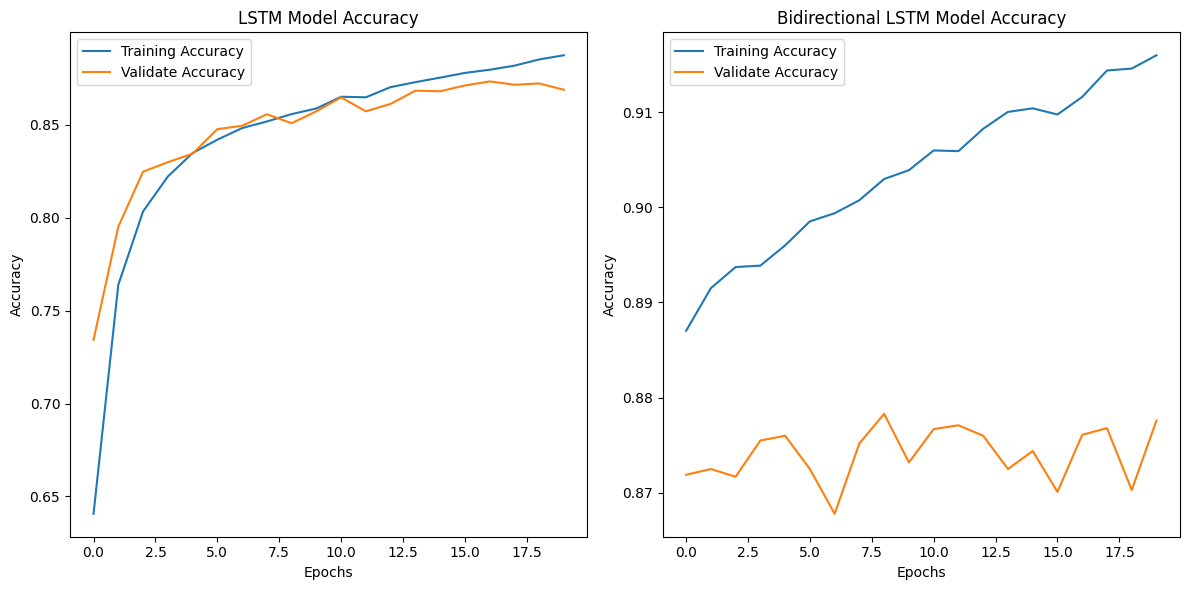

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(result_lstm.history["accuracy"], label="Training Accuracy")
plt.plot(result_lstm.history["val_accuracy"], label="Validate Accuracy")
plt.title("LSTM Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.subplot(1,2,2)
plt.plot(result_bidirectional_lstm.history["accuracy"], label="Training Accuracy")
plt.plot(result_bidirectional_lstm.history["val_accuracy"], label="Validate Accuracy")
plt.title("Bidirectional LSTM Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()